In [6]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import calendar
import time
from matplotlib import colors
from sklearn import preprocessing
import cartopy.crs as crs
import cartopy.feature as cfeature
import scipy

from src import get_corrs
from src import format_error_df
from src import plot_heatmaps
from src import read_nwp_data

In [8]:
init = "12"

(
    gfs_fcast_and_error_df,
    nam_fcast_and_error_df,
    hrrr_fcast_and_error_df,
) = read_nwp_data.read_data(init)
gfs_fcast_and_error_df = gfs_fcast_and_error_df.reset_index()
nam_fcast_and_error_df = nam_fcast_and_error_df.reset_index()
hrrr_fcast_and_error_df = hrrr_fcast_and_error_df.reset_index()

In [18]:
lulc = pd.read_csv("/home/aevans/nwp_bias/src/correlation/data/aspect_gfs.csv")
# lulc = lulc.drop(columns=["site", "station"])
keys = [
    "No Slope",
    "North:Low",
    "NE:Low",
    "East:Low",
    "SE:Low",
    "South:Low",
    "SW:Low",
    "West:Low",
    "NW:Low",
    "NE:Medium",
    "East:Medium",
    "SE:Medium",
    "SW:Medium",
    "NW:Medium",
    "North:Medium",
]

In [19]:
lulc

,site,19,21,22,23,24,25,26,27,28,32,33,34,36,38,31,station
0,1,79.487179,2.136752,1.851852,2.706553,2.706553,2.421652,2.849003,2.421652,3.418803,0.000000,0.000000,0.000000,0.0,0.000000,0.0,ADDI
1,2,47.592068,5.665722,3.257790,8.356941,5.099150,4.107649,5.949008,9.631728,10.339943,0.000000,0.000000,0.000000,0.0,0.000000,0.0,ANDE
2,3,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,BATA
3,4,82.528409,2.272727,1.420455,3.409091,0.568182,0.426136,1.846591,3.551136,3.977273,0.000000,0.000000,0.000000,0.0,0.000000,0.0,BEAC
4,5,87.570621,0.564972,1.271186,0.564972,0.141243,0.423729,0.564972,5.790960,3.107345,0.000000,0.000000,0.000000,0.0,0.000000,0.0,BELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,51.104566,2.798233,4.270987,12.076583,5.449190,1.914580,1.472754,8.247423,10.751105,0.147275,1.030928,0.441826,0.0,0.294551,0.0,WFMB
122,123,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,WGAT
123,124,70.231214,0.289017,2.023121,14.450867,2.456647,0.578035,2.745665,4.624277,2.601156,0.000000,0.000000,0.000000,0.0,0.000000,0.0,WHIT
124,125,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,WOLC


In [11]:
keys

['No Slope',
 'North:Low',
 'NE:Low',
 'East:Low',
 'SE:Low',
 'South:Low',
 'SW:Low',
 'West:Low',
 'NW:Low',
 'NE:Medium',
 'East:Medium',
 'SE:Medium',
 'SW:Medium',
 'NW:Medium',
 'North:Medium']

In [12]:
months_df = format_error_df.format_df(gfs_fcast_and_error_df)

In [13]:
months_df

,time,station,t2m_error
0,1,ADDI,-0.265366
1,1,ANDE,-0.502951
2,1,BATA,-0.302963
3,1,BEAC,-0.476425
4,1,BELD,-0.199078
...,...,...,...
1507,12,WFMB,0.367677
1508,12,WGAT,0.472789
1509,12,WHIT,-0.305064
1510,12,WOLC,-0.517415


# GFS

In [14]:
(
    df_pers,
    df_rho,
    df_tau,
    df_p_score,
    df_p_score_rho,
    df_p_score_tau,
) = get_corrs.get_corrs(months_df, lulc, keys)

/home/aevans/nwp_bias/src/correlation/gfs/../src/get_corrs.py:53: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, val in lulc.iteritems():
/home/aevans/nwp_bias/src/correlation/gfs/../src/get_corrs.py:53: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, val in lulc.iteritems():
/home/aevans/nwp_bias/src/correlation/gfs/../src/get_corrs.py:53: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, val in lulc.iteritems():
/home/aevans/nwp_bias/src/correlation/gfs/../src/get_corrs.py:53: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, val in lulc.iteritems():
/home/aevans/nwp_bias/src/correlation/gfs/../src/get_corrs.py:53: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, val in lulc.ite

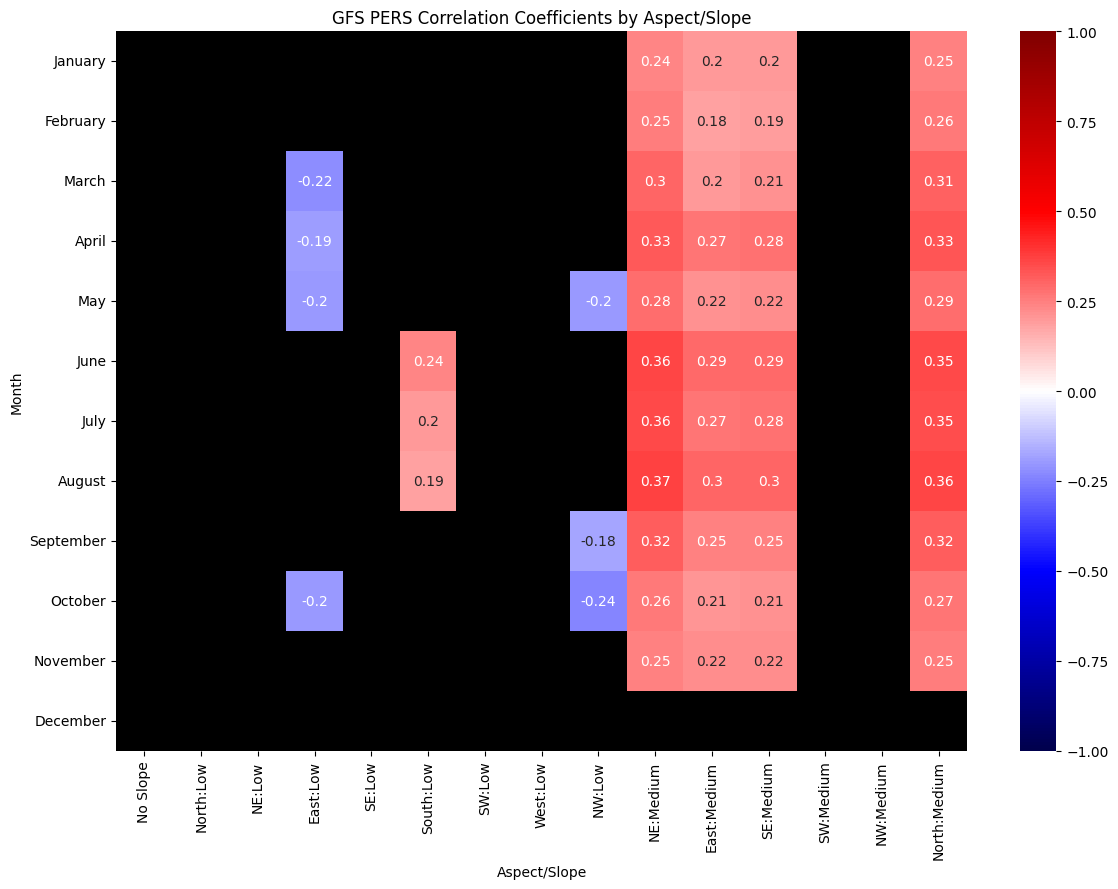

In [15]:
plot_heatmaps.plot_heatmap_corrs(df_pers, "PERS", "Aspect/Slope", "GFS")

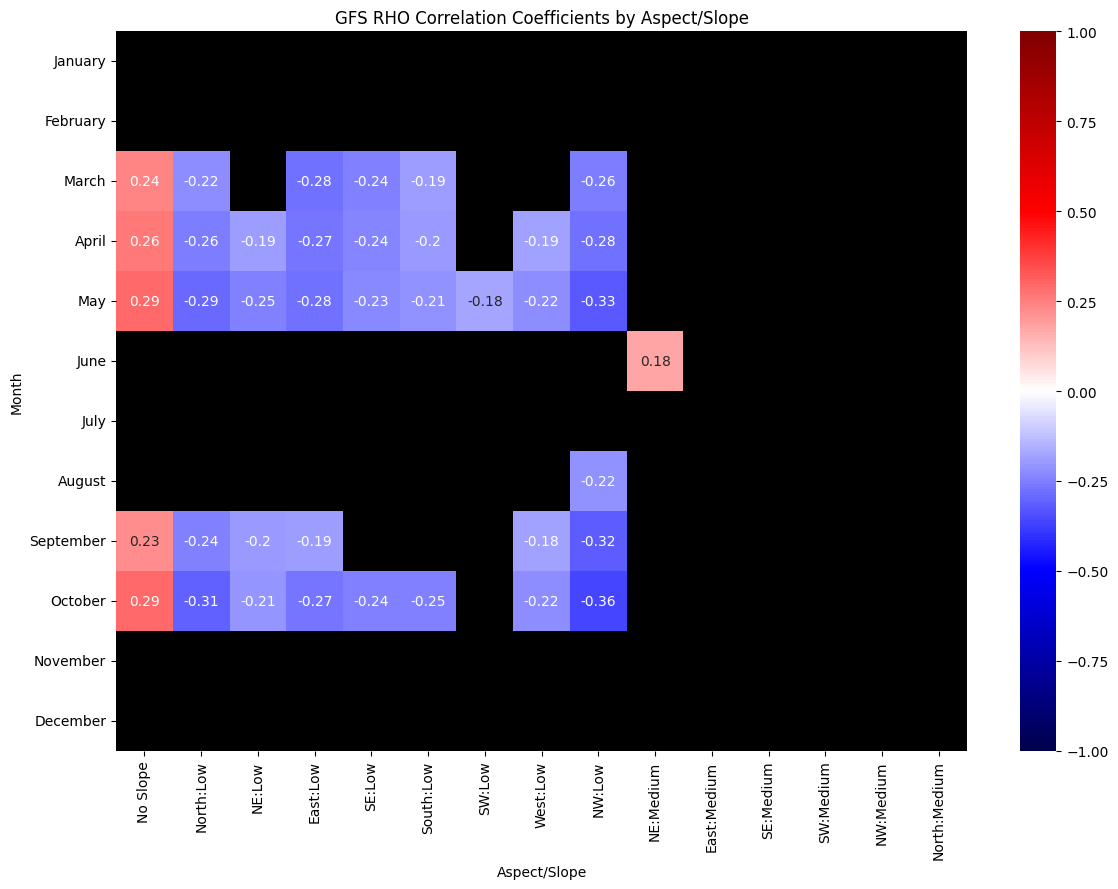

In [16]:
plot_heatmaps.plot_heatmap_corrs(df_rho, "RHO", "Aspect/Slope", "GFS")

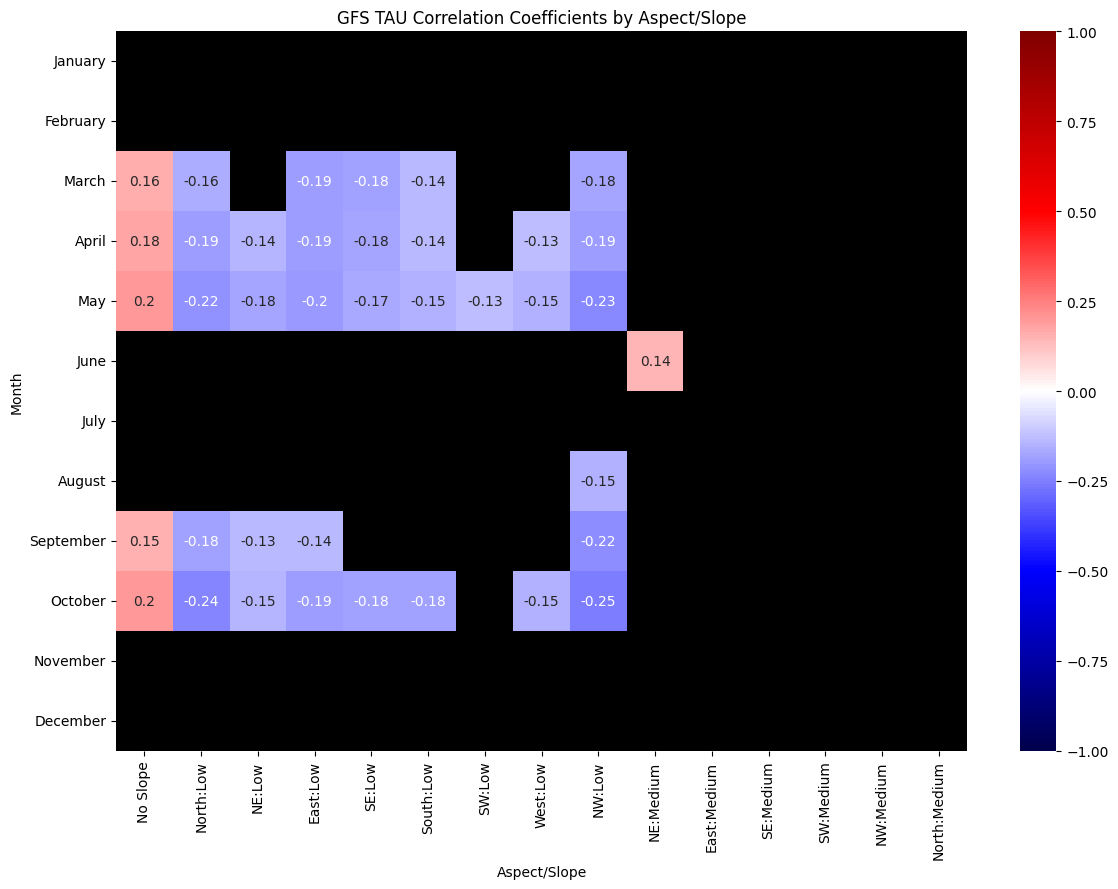

In [17]:
plot_heatmaps.plot_heatmap_corrs(df_tau, "TAU", "Aspect/Slope", "GFS")